<ErrorbarContainer object of 3 artists>

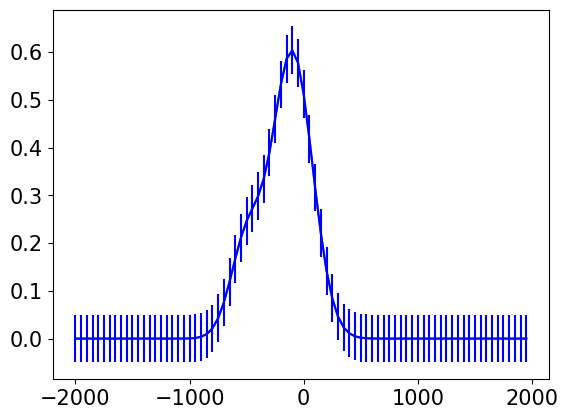

In [1]:
from ISMgas.fitting.DoubleGaussian import DoubleGaussian
import matplotlib.pyplot as plt
import numpy as np

## Generate some mock data 
x = np.arange(-2000,2000,50)
y = 0.6*np.exp(-((x+100)/250)**2) +0.2*np.exp(-((x+500)/200)**2)
yerr = 0.05*np.ones(len(x))

plt.plot(x,y)
plt.errorbar(
    x = x,
    y = y,
    yerr= yerr,
    color = 'blue',
)


In [2]:
dd = DoubleGaussian(
    x = x, 
    y = y, 
    yerr = yerr
)
dd.priors  = {
    '1': {
        "Amin"        : -1.0,
        "Amax"        : -0.1,
        "A1min"       : -1.0,
        "A1max"       : -0.1,
        "Amin_SG"     : -1.0,
        "Amax_SG"     : -0.1,
        "vmin"        : -700,
        "vmax"        : 500,
        "v1min"       : -700,
        "v1max"       : 500,
        "vmin_SG"     : -700,
        "vmax_SG"     : 500,
        "sigmin"      : 50,
        "sigmax"      : 700,
        "sig1min"     : 50,
        "sig1max"     : 700,
        "sigmin_SG"   : 50,
        "sigmax_SG"   : 700,
        "v-v1_min"    : 0, ### Controls the separation between the centroids of the two gaussians (strongly recommended)
        "v-v1_max"    : -800,
        "cont_lvl"    : 0 ### Choose continuum level
    }
}

fitResults = dd.fitting(seed=12345)
fitResultsSG = dd.fitting(seed=12345, double_gaussian = False)

/home/keerthi/anaconda3/lib/python3.8/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


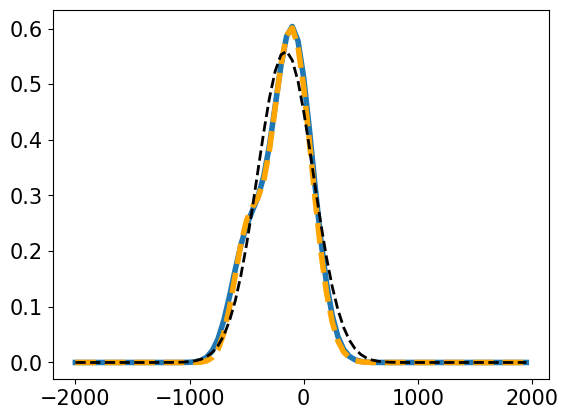

In [3]:
plt.plot(x,y, linewidth= 4)
plt.plot(fitResults['fitted_wav'],fitResults['fitted_flux'],color='orange', linestyle = '--',linewidth = 4,)
plt.plot(fitResultsSG['fitted_wav'],fitResultsSG['fitted_flux'],color='black', linestyle = '--',linewidth = 2,)
